In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import chess

In [4]:
games = pd.read_csv("games.csv")
games.head(5)

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


In [34]:
high_rated_games = games[(games["white_rating"] >= 1600) & (games["black_rating"] >= 1600)].reset_index(drop=True)
high_rated_games.head(3)

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,h1unxHlo,True,1.504200e+12,1.504200e+12,113,draw,draw,15+0,avelez8,1745,anonymous1705,1714,d4 d5 c4 Nf6 Nc3 Bf5 Bf4 a6 Nf3 e6 a3 Nc6 e3 B...,D06,Queen's Gambit Refused: Marshall Defense,4
1,OIyTAHCP,True,1.504190e+12,1.504190e+12,62,resign,white,15+0,avelez8,1734,ars01,1748,d4 d5 c4 Nf6 Nc3 dxc4 e3 Be6 Nf3 a6 b3 cxb3 ax...,D06,Queen's Gambit Refused: Marshall Defense,4
2,bnCnIJSz,True,1.503540e+12,1.503550e+12,101,resign,white,10+0,salah04,1942,avelez8,1739,e4 e6 d4 d5 Nc3 c5 exd5 exd5 Nf3 Nc6 Bb5 Nf6 O...,C10,French Defense: Marshall Variation,6


In [35]:
opening_move = high_rated_games.loc[:, ["white_rating", "moves"]]
opening_move['moves'] = opening_move['moves'].apply(lambda s: s[:2])
opening_move

,white_rating,moves
0,1745,d4
1,1734,d4
2,1942,e4
3,1724,e4
4,1951,e4
...,...,...
6860,1822,e4
6861,1842,e4
6862,1878,c4
6863,1890,c4


In [36]:
opening_move['moves'].value_counts()

e4    4013
d4    1952
Nf     327
c4     256
b3      72
f4      47
e3      43
b4      38
g3      37
d3      23
Nc      18
c3      14
g4       6
f3       6
Nh       4
a3       4
h4       2
h3       2
a4       1
Name: moves, dtype: int64

In [51]:
move_frequencies = opening_move['moves'].value_counts()

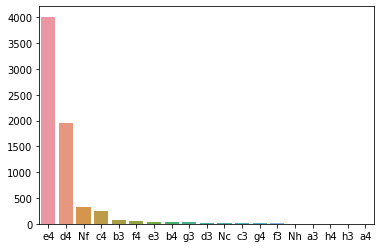

In [52]:
sns.barplot(x = move_frequencies.keys(), y = move_frequencies.array)